In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# task01
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

- zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
- ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

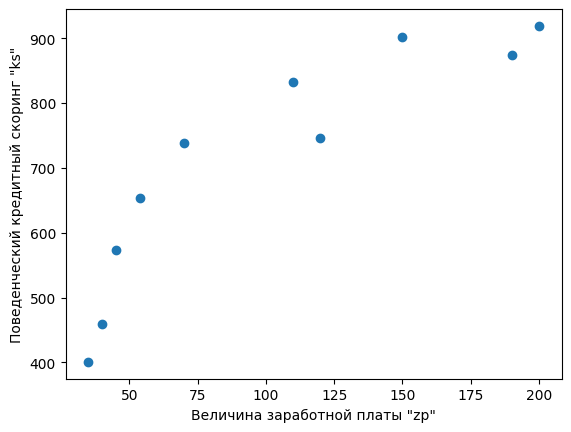

Судя по графигу видно, что зависимость линейная.
Ожидаем, что между данными существует положительная корреляция.


In [7]:
zp_arr = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_arr = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp_arr, ks_arr)
plt.xlabel('Величина заработной платы "zp"')
plt.ylabel('Поведенческий кредитный скоринг "ks"', rotation=90)
plt.show()
print('Судя по графигу видно, что зависимость линейная.'
      '\nОжидаем, что между данными существует положительная корреляция.')

- Вычислим ковариацию двух величин
- Находим коэффициент корреляции Пирсона

In [8]:
zp_ks_cov1 = np.mean(zp_arr * ks_arr) - np.mean(zp_arr) * np.mean(ks_arr)
print(f'Cov1 = {zp_ks_cov1: .3f}')
zp_ks_cov2 = np.cov(zp_arr, ks_arr, ddof=0)[0, 1]
print(f'Cov2 = {zp_ks_cov2: .3f}')

zp_ks_corr1 = zp_ks_cov1 / (np.std(zp_arr) * np.std(ks_arr))
print(f'Коэффициент корреляции Пирсона рассчитанный с помощью ковариации и '
      f'среднеквадратичных отклонений двух признаков = {zp_ks_corr1: .3f}')
zp_ks_corr2 = np.corrcoef(zp_arr, ks_arr)[0][1]
print(f'Коэффициент корреляции Пирсона рассчитанный с использованием функции '
      f'"corrcoef" из библиотеки numpy = {zp_ks_corr2: .3f}')
zp_ks_corr3 = pd.Series(zp_arr).corr(pd.Series(ks_arr), method='pearson')
print(f'Коэффициент корреляции Пирсона рассчитанный с использованием функции '
      f'"Series" из библиотеки pandas = {zp_ks_corr3: .3f}')

Cov1 =  9157.840
Cov2 =  9157.840
Коэффициент корреляции Пирсона рассчитанный с помощью ковариации и среднеквадратичных отклонений двух признаков =  0.887
Коэффициент корреляции Пирсона рассчитанный с использованием функции "corrcoef" из библиотеки numpy =  0.887
Коэффициент корреляции Пирсона рассчитанный с использованием функции "Series" из библиотеки pandas =  0.887


 # task02
 Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
 - 131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [9]:
alpha = 0.05
iq_arr = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

n = iq_arr.size
std = iq_arr.std(ddof=1)
mean = iq_arr.mean()
print(f'Размер выборки n = {n}\nСреднее квадратическое отклонение '
      f'(несмещенное) по выборке = {std:.3f}\n'
      f'Среднее выборочне = {mean: .3f}')

#Cчитаем значения t и отклонение

t = stats.t.ppf(1 - alpha / 2, n - 1)
d = t * std / (n) ** 0.5
print(f't ={t: .5f} \nотклонение ={d: .5f}')

min_iq = mean - d
max_iq = mean + d
print(f'Доверительный интервал для математического ожидания с надежностью 0.95 '
      f'составляет:{min_iq: .3f};{max_iq: .3f}')

Размер выборки n = 10
Среднее квадратическое отклонение (несмещенное) по выборке = 10.546
Среднее выборочне =  118.100
t = 2.26216 
отклонение = 7.54392
Доверительный интервал для математического ожидания с надежностью 0.95 составляет: 110.556; 125.644


# task03
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. 

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [10]:
var = 25
n = 27
mean = 174.2
std = var ** 0.5
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2, n - 1)
d = z * std / (n) ** 0.5
min = mean - d
max = mean + d
print(f'Доверительный интервал для математического ожидания с надежностью 0.95 '
      f' = [{min:.3f};{max: .3f}]')

Доверительный интервал для математического ожидания с надежностью 0.95  = [147.296; 201.104]
